In [2]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

***

# TweetsCov19
## KDE-Plot

***

In [3]:
#Die gepostete Tweets von den Benutzer mit bekannten pro- oder anti-wissenschaftlichen Meinungen wird gelesen.
pfad_tsv1 = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/TweetsCov19_sample/df_polarisierungen/tweetscov19_user_tweets_science_all.tsv'

df_tweetscov19 = pd.read_csv(pfad_tsv1, sep='\t', error_bad_lines=False, names=['Tweet_Id', "Username", 'num_posted', 'num_del', 'Deletion_ratio', 'Reputation', 'Urls_num', 'neg', 'pos', 'pol_num', 'science', 'is_deleted'])
pd.options.display.max_columns = None
print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (805725, 12)


,Tweet_Id,Username,num_posted,num_del,Deletion_ratio,Reputation,Urls_num,neg,pos,pol_num,science,is_deleted
0,1178791774627811328,cd45cd8eae02f9b33d9e7de16042534d,205,6,0.0293,0.8605,36,-24,20,44,-0.0909,False
1,1179349595299729409,cd45cd8eae02f9b33d9e7de16042534d,205,6,0.0293,0.8605,36,-24,20,44,-0.0909,False
2,1179362665724043269,cd45cd8eae02f9b33d9e7de16042534d,205,6,0.0293,0.8605,36,-24,20,44,-0.0909,True
3,1179588665917476865,cd45cd8eae02f9b33d9e7de16042534d,205,6,0.0293,0.8605,36,-24,20,44,-0.0909,False
4,1179943073020862465,cd45cd8eae02f9b33d9e7de16042534d,205,6,0.0293,0.8605,36,-24,20,44,-0.0909,False


In [4]:
#Die egelöschten und nicht gelöschten Tweets trennen.
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [5]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['science']>0]
print('Alle pro. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['science']<0]
print('Alle anti. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 36104
Alle pro. Users in gesammten Tweets: 19226
Alle anti. Users in gesammten Tweets: 16878


In [6]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['science']>0]
print('Alle pro. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['science']<0]
print('Alle anti. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 12367
Alle pro. Users in gelöschten Tweets: 4563
Alle anti. Users in gelöschten Tweets: 7804


In [7]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['science']>0]
print('Alle pro. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['science']<0]
print('Alle anti. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 28014
Alle pro. Users in nicht gelöschten Tweets: 16940
Alle anti. Users in nicht gelöschten Tweets: 11074


In [17]:
#Kerndichteschätzung der geposteten und gelöschten Tweets wird dargestellt.
def plot_kdeplot(df, hue, x, x_label, titel, name): 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/kde/'+name+'.pdf')


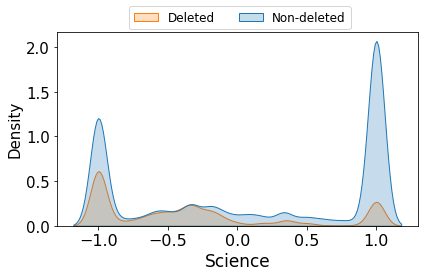

In [9]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets')

In [18]:
#Kerndichteschätzung der geposteten und gelöschten Tweets wird dargestellt.
#Englische Labels
def plot_kdeplot_de(df, hue, x, x_label, titel, name): 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_ylabel(ylabel='Dichte', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    plt.legend(labels = ['Gelöscht','Nicht gelöscht'], bbox_to_anchor=(0.18, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/kde/de/'+name+'.pdf')


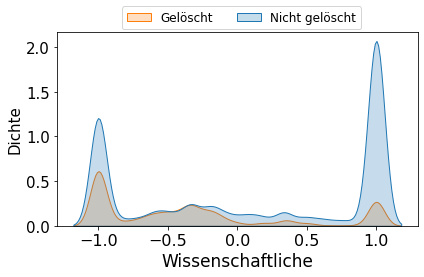

In [25]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_de(df, 'is_deleted','science' ,'Wissenschaftliche' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets')

***

# Histogram

***

In [19]:
#Die Anzahl der anti- und pro-wissenschaftlichen Benutzer entlang der wissenschaftlichen Achse wird dargestellt.
def plot_histogram_en(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('gold')
    patches[1].set_label('Anti-Science')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('forestgreen')
    patches[9].set_label('Pro-Science')
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Science', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hist/pdfs/urls/'+titel+'.pdf')

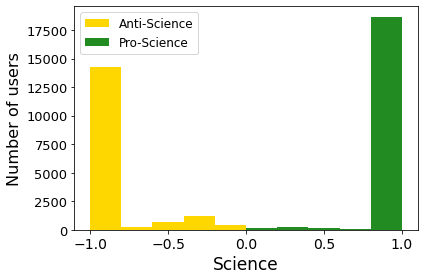

In [18]:
#Alle Tweets
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram_en(df['science'],'hist_tweetsCov19_URLs_Science_pol')

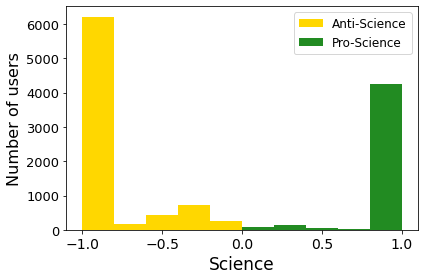

In [19]:
#Gelöschte Tweets
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram_en(df['science'],'hist_tweetsCov19_del_URLs_Science_pol')

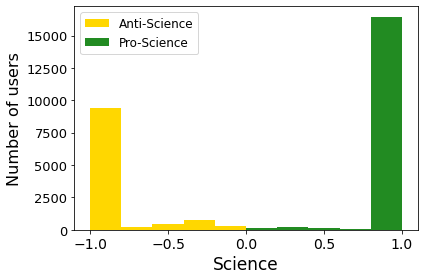

In [20]:
#Nicht gelöschte Tweets
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram_en(df['science'],'hist_tweetsCov19_undel_URLs_Science_pol')

In [4]:
#Die Anzahl der anti- und pro-wissenschaftlichen Benutzer entlang der wissenschaftlichen Achse wird dargestellt.
#Englische Labels
def plot_histogram_de(df, titel):
    
    fig, ax = plt.subplots()
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('gold')
    patches[1].set_label('Anti-Wissenschaft')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('forestgreen')
    patches[9].set_label('Pro-Wissenschaft')
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Anzahl der Benutzer', fontsize=16)
    ax.set_xlabel(xlabel='Wissenschaftliche', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    plt.tight_layout()
    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hist/pdfs/de/'+titel+'.pdf')

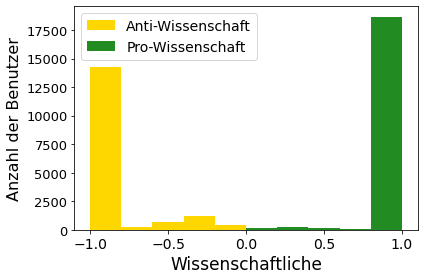

In [5]:
#Alle Tweets
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram_de(df['science'],'hist_tweetsCov19_URLs_Science_pol')

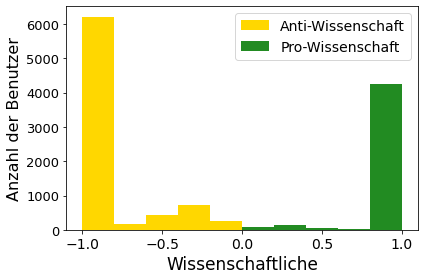

In [6]:
#Gelöschte Tweets
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram_de(df['science'],'hist_tweetsCov19_del_URLs_Science_pol')

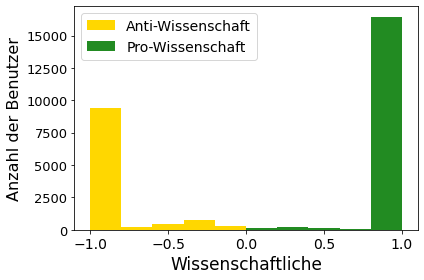

In [7]:
#Nicht gelöschte Tweets
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram_de(df['science'],'hist_tweetsCov19_undel_URLs_Science_pol')

***

# Hexabin
### Reputation-Polarisierung

***

In [11]:
#Die Beziehung zwischen der Reputation der Benutzer und wissenschaftliche Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der posteten und gelöschten Tweets geachtet. 
def plot_hexbin_reputaion(df, hue,x ,x_label, color, titel):

    ax = df.plot.hexbin(x=x, y="Reputation",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Reputaion', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hexabin/all_tweets/'+titel+'.pdf')
    #plt.show()

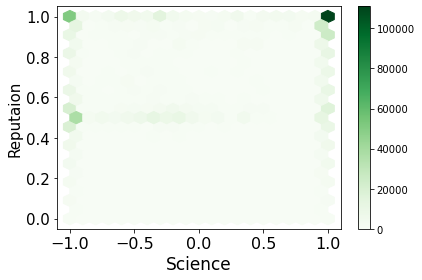

In [12]:
#Alle Tweets
df = df_tweetscov19[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_science_reputation_all')

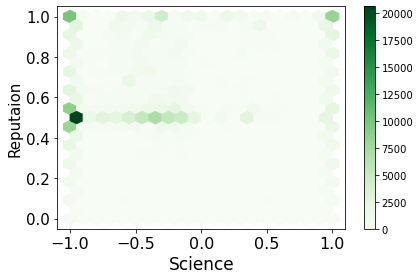

In [13]:
#Gelöschte Tweets
plot_hexbin_reputaion(df_del, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_del_science_reputation_all')

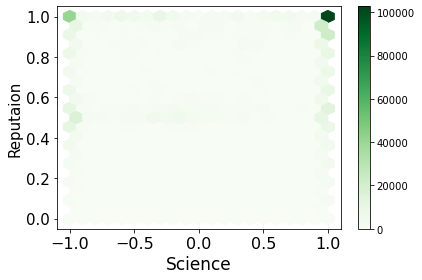

In [14]:
#Nicht gelöschte Tweets
plot_hexbin_reputaion(df_undel, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_undel_science_reputation_all')

In [27]:
#Die Beziehung zwischen der Reputation der Benutzer und wissenschaftliche Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der posteten und gelöschten Tweets geachtet.
#Englische Leabels
def plot_hexbin_reputaion_de(df, hue,x ,x_label, color, titel):

    ax = df.plot.hexbin(x=x, y="Reputation",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Reputaion', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hexabin/de/'+titel+'.pdf')
    #plt.show()

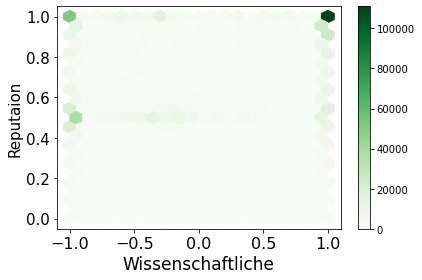

In [28]:
#Alle Tweets
df = df_tweetscov19[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion_de(df, 'is_deleted','science', 'Wissenschaftliche', 'Greens', 'Hexabinplot_tweetscov19_science_reputation_all')

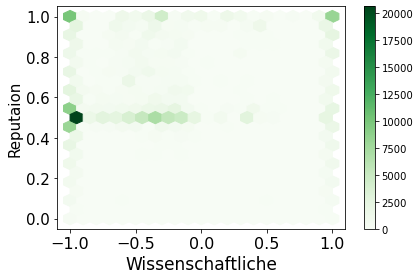

In [29]:
#Gelöschte Tweets
plot_hexbin_reputaion_de(df_del, 'is_deleted','science', 'Wissenschaftliche', 'Greens', 'Hexabinplot_tweetscov19_del_science_reputation_all')

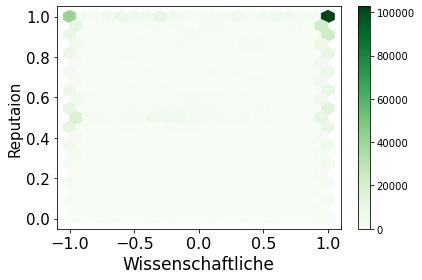

In [30]:
#Nicht gelöschte Tweets
plot_hexbin_reputaion_de(df_undel, 'is_deleted','science', 'Wissenschaftliche', 'Greens', 'Hexabinplot_tweetscov19_undel_science_reputation_all')

****

# Hexabin
### Löschungsquote-Polarisierung

***

In [15]:
#Die Beziehung zwischen der Löschungsquote der Benutzer und wissenschaftliche Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der geposteten undgelöschten Tweets geachtet. 
#Englische Labels
def plot_hexbin_deletion_ratio(df, hue,x ,x_label, color, titel):

    ax = df.plot.hexbin(x=x, y="Deletion_ratio",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Deletion ratio', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hexabin/deletion_ratio/'+titel+'.pdf')
    #plt.show()

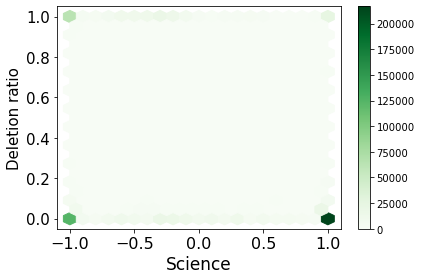

In [16]:
#Alle Tweets
df = df_tweetscov19[['is_deleted', 'science', 'Deletion_ratio']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_deletion_ratio(df, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_science_deletion_ratio_all')

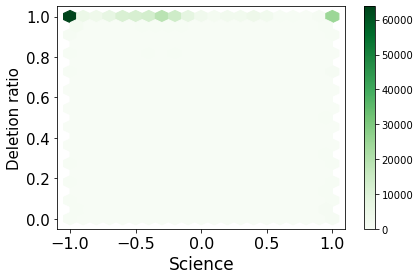

In [17]:
#Gelöschte Tweets
plot_hexbin_deletion_ratio(df_del, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_del_science_deletion_ratio_all')

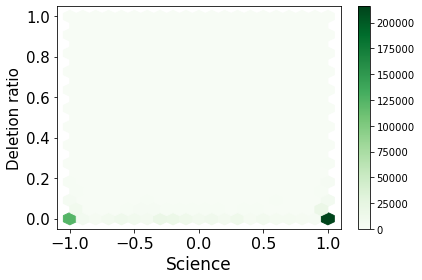

In [18]:
#Nicht gelöschte Tweets
plot_hexbin_deletion_ratio(df_undel, 'is_deleted','science', 'Science', 'Greens', 'Hexabinplot_tweetscov19_undel_science_deletion_ratio_all')

***

# TweetKB
## KDE-Plot

***

In [8]:
#Die gepostete Tweets von den Benutzer mit bekannten politischen Meinungen lesen.
pfad_tsv1 = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/df_polarisierungen/tweetskb_user_tweets_science_all.tsv'

df_tweetskb = pd.read_csv(pfad_tsv1, sep='\t', error_bad_lines=False, names=['Tweet_Id', "Username", 'num_posted', 'num_del', 'Deletion_ratio', 'Reputation', 'Urls_num', 'neg', 'pos', 'pol_num', 'science', 'is_deleted'])
pd.options.display.max_columns = None
print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (133805, 12)


,Tweet_Id,Username,num_posted,num_del,Deletion_ratio,Reputation,Urls_num,neg,pos,pol_num,science,is_deleted
0,1178791802725376003,caveofbeauty,8,0,0.0000,0.9898,2,0,1,1,1.0000,False
1,1187026533174644737,caveofbeauty,8,0,0.0000,0.9898,2,0,1,1,1.0000,False
2,1187804089079517189,caveofbeauty,8,0,0.0000,0.9898,2,0,1,1,1.0000,False
3,1230183274141691908,caveofbeauty,8,0,0.0000,0.9898,2,0,1,1,1.0000,False
4,1231051449494364162,caveofbeauty,8,0,0.0000,0.9898,2,0,1,1,1.0000,False


In [9]:
#Die egelöschten und nicht gelöschten Tweets trennen.
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [10]:
df_tweetskb_del.shape

(49630, 12)

In [11]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['science']>0]
print('Alle pro. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetskb[df_tweetskb['science']<0]
print('Alle anti. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 11311
Alle pro. Users in gesammten Tweets: 5019
Alle anti. Users in gesammten Tweets: 6292


In [12]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['science']>0]
print('Alle pro. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['science']<0]
print('Alle anti. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 3924
Alle pro. Users in gelöschten Tweets: 868
Alle anti. Users in gelöschten Tweets: 3056


In [13]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['science']>0]
print('Alle pro. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['science']<0]
print('Alle anti. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 8091
Alle pro. Users in nicht gelöschten Tweets: 4439
Alle anti. Users in nicht gelöschten Tweets: 3652


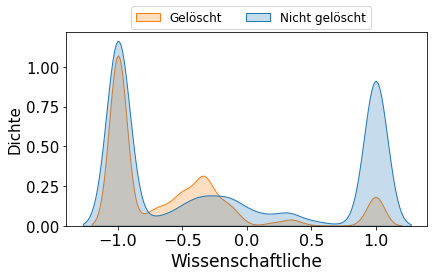

In [24]:
#Kerndichteschätzung der geposteten und gelöschten Tweets wird dargestellt.
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_de(df, 'is_deleted','science' ,'Wissenschaftliche' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets')

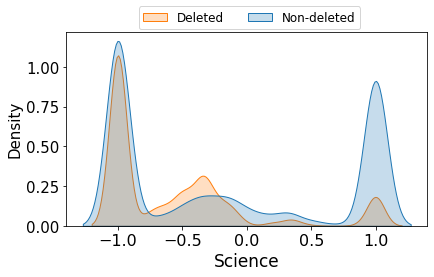

In [25]:
#Kerndichteschätzung der geposteten und gelöschten Tweets wird dargestellt.
#Englische Labels
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets')

***

# Histogram

***

In [5]:
#Die Anzahl der pro- und anti-wissenschaftliche Benutzer entlang der moderate Achse wird dargestellt.

def plot_histogram_kb_en(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('khaki')
    patches[1].set_label('Anti-Science')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('green')
    patches[9].set_label('Pro-Science')
        
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Science', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()

    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hist/pdfs/urls/'+titel+'.pdf')

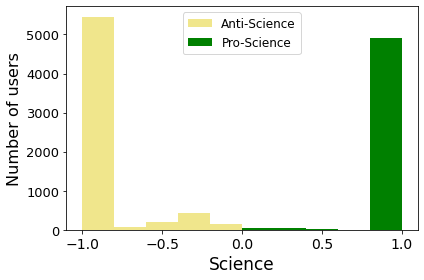

In [6]:
#Alle Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb_en(df['science'], 'hist_tweetskb_URLs_science_pol')

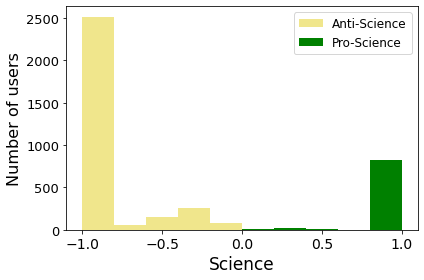

In [9]:
#Gelöschte Tweets
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb_en(df['science'], 'hist_tweetskb_del_URLs_science_pol')

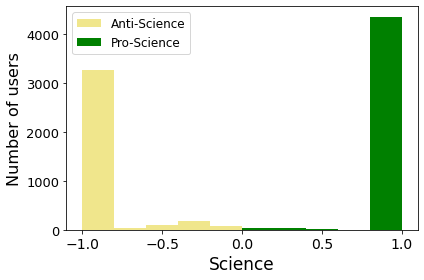

In [8]:
#Nicht gelöschte Tweets
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb_en(df['science'], 'hist_tweetskb_undel_URLs_science_pol')

In [10]:
#Die Anzahl der pro- und anti-wissenschaftliche Benutzer entlang der moderate Achse wird dargestellt.
#Englische Labels
def plot_histogram_kb_de(df, titel):
    
    fig, ax = plt.subplots()

    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('khaki')
    patches[1].set_label('Anti-Wissenschaft')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('green')
    patches[9].set_label('Pro-Wissenschaft')
        
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Anzahl der Benutzer', fontsize=16)
    ax.set_xlabel(xlabel='Wissenschaftliche', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    plt.tight_layout()

    plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/hist/pdfs/de/'+titel+'.pdf')

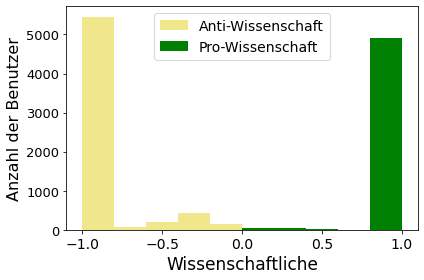

In [11]:
#Alle Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb_de(df['science'], 'hist_tweetskb_URLs_science_pol')

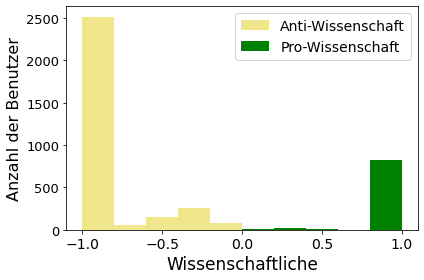

In [12]:
#Gelöschte Tweets
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb_de(df['science'], 'hist_tweetskb_del_URLs_science_pol')

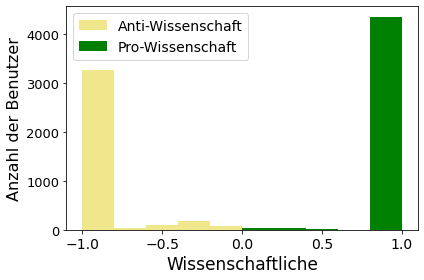

In [13]:
#Nicht gelöschte Tweets
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb_de(df['science'], 'hist_tweetskb_undel_URLs_science_pol')

***

# Hexabin
### Reputation-Polarisierung

***

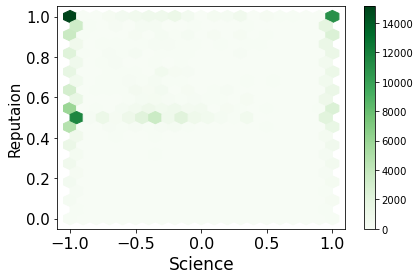

In [21]:
#Die Beziehung zwischen der Reputation der Benutzer und wissenschaftlicher Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der gelöschten Tweets geachtet.
#Alle Tweets
df = df_tweetskb[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted', 'science', 'Science', 'Greens', 'Hexabinplot_tweetsKB_science_reputation_all')

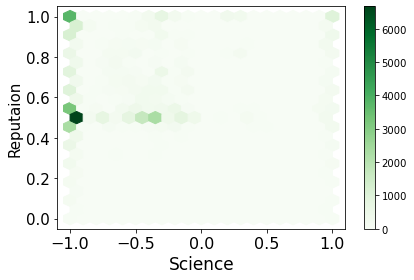

In [22]:
#Gelöschte Tweets
plot_hexbin_reputaion(df_del, 'is_deleted', 'science', 'Science', 'Greens','Hexabinplot_tweetsKB_del_science_reputation_all')

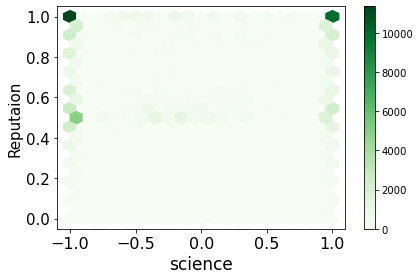

In [23]:
#nicht gelöschte Tweets
plot_hexbin_reputaion(df_undel, 'is_deleted', 'science', 'science', 'Greens', 'Hexabinplot_tweetsKB_undel_science_reputation_all')

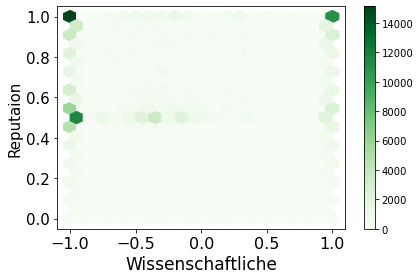

In [39]:
#Die Beziehung zwischen der Reputation der Benutzer und wissenschaftlicher Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der gelöschten Tweets geachtet.
#Englische Labels
#Alle Tweets
df = df_tweetskb[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion_de(df, 'is_deleted', 'science', 'Wissenschaftliche', 'Greens', 'Hexabinplot_tweetsKB_science_reputation_all')

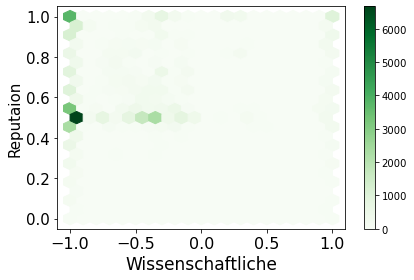

In [40]:
#Gelöschte Tweets
plot_hexbin_reputaion_de(df_del, 'is_deleted', 'science', 'Wissenschaftliche', 'Greens','Hexabinplot_tweetsKB_del_science_reputation_all')

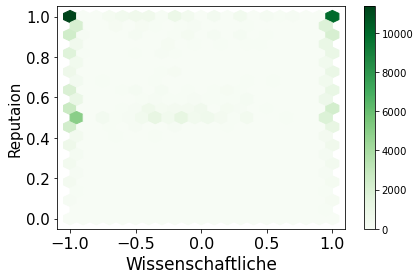

In [41]:
#Nicht gelöschte Tweets
plot_hexbin_reputaion_de(df_undel, 'is_deleted', 'science', 'Wissenschaftliche', 'Greens', 'Hexabinplot_tweetsKB_undel_science_reputation_all')

***

# Hexabin
### Löschungsquote-Polarisierung

***

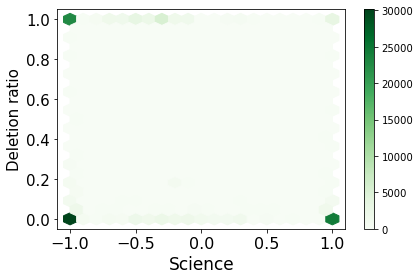

In [24]:
#Die Beziehung zwischen der Löschunsquote der Benutzer und politischer Polarisierung wird dargestellt. 
#Dabei wird auf die Anzahl der gelöschten Tweets geachtet.
#Englische Labels
#Alle Tweets
df = df_tweetskb[['is_deleted', 'science', 'Deletion_ratio']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_deletion_ratio(df, 'is_deleted', 'science', 'Science', 'Greens', 'Hexabinplot_tweetsKB_science_deletion_ratio_all')

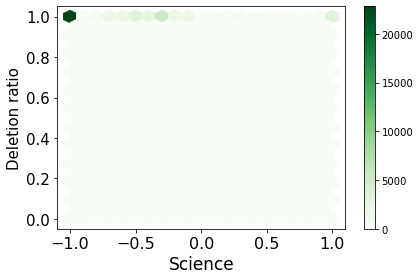

In [25]:
#Gelöschte Tweets
plot_hexbin_deletion_ratio(df_del, 'is_deleted', 'science', 'Science', 'Greens', 'Hexabinplot_tweetsKB_del_science_deletion_ratio_all')

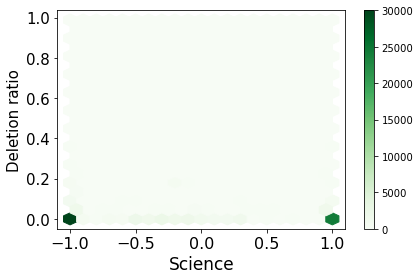

In [26]:
#Nicht gelöschte Tweets
plot_hexbin_deletion_ratio(df_undel, 'is_deleted', 'science', 'Science', 'Greens', 'Hexabinplot_tweetsKB_undel_science_deletion_ratio_all')